In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

sns.set_theme(style='whitegrid')
grey = '#aca7a7'

In [2]:
df = pd.read_pickle('../data/watch_list_clean.pkl.xz')

In [3]:
anime = df[['title', 'num_eps', 'ongoing', 'duration', 'studio', 'start_year', 
            'end_year', 'season', 'avg_rating', 'num_votes', 'synopsis', 'tags', 'content_warnings', 
            'url']].drop_duplicates(['title', 'url'],
                                    ignore_index=True).sort_values('avg_rating', 
                                                                   ascending=False, 
                                                                   ignore_index=True).copy(deep=True)
anime[['start_year', 'end_year']] = anime[['start_year', 'end_year']].replace('TBA', np.NaN).astype('float')

In [4]:
df.sample(5)

,title,url,username,status,times_watched,user_rating,num_eps,ongoing,duration,studio,start_year,end_year,season,avg_rating,num_votes,synopsis,tags,content_warnings
9178474,The Devil is a Part-Timer!,https://www.anime-planet.com/anime/the-devil-i...,internetweird0,Watched,1,4.0,13,False,NaN,WHITE FOX,2013.0,2013.0,Spring,4.060,49827,When Demon King Satan was facing his demise at...,"[Action, Comedy, Fantasy, Slice of Life, Conte...",None
5480600,"Demon Lord, Retry!",https://www.anime-planet.com/anime/demon-lord-...,A102P5,Dropped,0,1.5,12,False,NaN,EKACHI EPILKA,2019.0,2019.0,Summer,3.676,7925,"On the night of his favorite game’s shutdown, ...","[Action, Adventure, Fantasy, Demon King, Demon...",None
5157597,And Yet the Town Moves,https://www.anime-planet.com/anime/and-yet-the...,BoyTomoChan,Watched,1,3.5,12,False,NaN,SHAFT,2010.0,2010.0,Fall,3.552,2412,The brash Hotori Arashiyama is a far from regu...,"[Comedy, Seinen, Slice of Life, Cafe, Maids, B...",None
5707665,Teasing Master Takagi-san 2,https://www.anime-planet.com/anime/teasing-mas...,bladeweaver,Watched,1,4.5,12,False,NaN,Shin-Ei Animation,2019.0,2019.0,Summer,4.146,3652,"Now in his second year of middle school, Nishi...","[Comedy, Romance, Shounen, Slice of Life, Iyas...",None
869509,Hamatora,https://www.anime-planet.com/anime/hamatora,amaya0013,Watching,0,4.0,12,False,NaN,NAZ,2014.0,2014.0,Winter,3.715,9041,"""Minimum""— Otherwise known as ""small miracles""...","[Action, Drama, Mystery, Seinen, Superpowers, ...",[Violence]


In [5]:
anime.head()

,title,num_eps,ongoing,duration,studio,start_year,end_year,season,avg_rating,num_votes,synopsis,tags,content_warnings,url
0,Fruits Basket the Final Season,13,False,NaN,TMS Entertainment,2021.0,2021.0,Spring,4.633,4764,The final arc of Fruits Basket.,"[Drama, Fantasy, Romance, Shoujo, Animal Trans...","[Emotional Abuse, Mature Themes, Suicide]",https://www.anime-planet.com/anime/fruits-bask...
1,Fullmetal Alchemist: Brotherhood,64,False,NaN,Bones,2009.0,2010.0,Spring,4.580,102561,The foundation of alchemy is based on the law ...,"[Action, Adventure, Drama, Fantasy, Mystery, S...","[Animal Abuse, Mature Themes, Violence, Domest...",https://www.anime-planet.com/anime/fullmetal-a...
2,Attack on Titan 3rd Season: Part II,10,False,NaN,WIT Studio,2019.0,2019.0,Spring,4.578,39571,The battle to retake Wall Maria begins now! Wi...,"[Action, Fantasy, Horror, Shounen, Dark Fantas...","[Cannibalism, Explicit Violence]",https://www.anime-planet.com/anime/attack-on-t...
3,Attack on Titan The Final Season,16,False,NaN,MAPPA,2020.0,2021.0,Fall,4.578,25518,It's been four years since the Scout Regiment ...,"[Action, Drama, Fantasy, Horror, Shounen, Dark...","[Explicit Violence, Mature Themes, Physical Ab...",https://www.anime-planet.com/anime/attack-on-t...
4,Jujutsu Kaisen,24,False,NaN,MAPPA,2020.0,2021.0,Fall,4.577,36351,Although Yuji Itadori looks like your average ...,"[Action, Horror, Shounen, Curse, Monsters, Sch...",[Explicit Violence],https://www.anime-planet.com/anime/jujutsu-kaisen


### `title`/`anime_url`

In [6]:
df['title'].nunique()

4473

#### Which shows are the most popular?

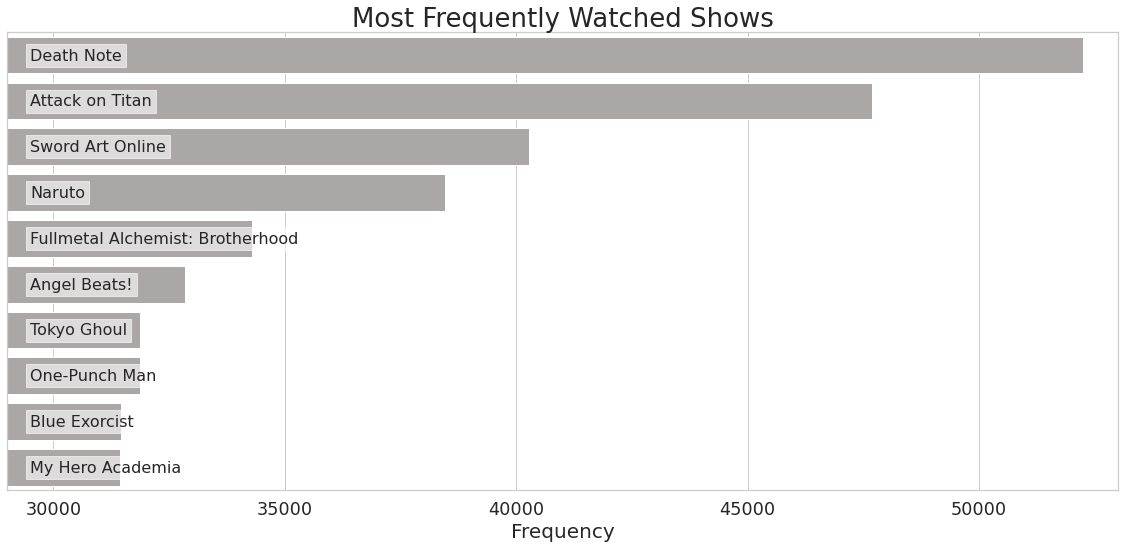

In [10]:
fig = plt.figure(figsize=(16, 8))
sns.set_theme(font_scale=1.6, style='whitegrid')
sns.countplot(y='title', data=df, 
              order=df['title'].value_counts().iloc[:10].index,
              color=grey, saturation=1)
plt.title('Most Frequently Watched Shows', fontdict={'fontsize':26})
plt.xlabel('Frequency', fontdict={'fontsize':20})
plt.ylabel('')
plt.yticks([])
plt.xlim(29000, 53000)
for idx, val in enumerate(df['title'].value_counts().iloc[:10].index):
    plt.text(29500, idx+0.1, val, fontdict={'fontsize':16, 'backgroundcolor':(1, 1, 1, 0.6)})
plt.tight_layout()
plt.show()
fig.savefig('../assets/01_title_top10.png', dpi=200)

### `num_eps`

In [8]:
anime['num_eps'].agg(['min', 'median', 'mean', 'max'])

min          1.000000
median      20.000000
mean        35.872569
max       2617.000000
Name: num_eps, dtype: float64

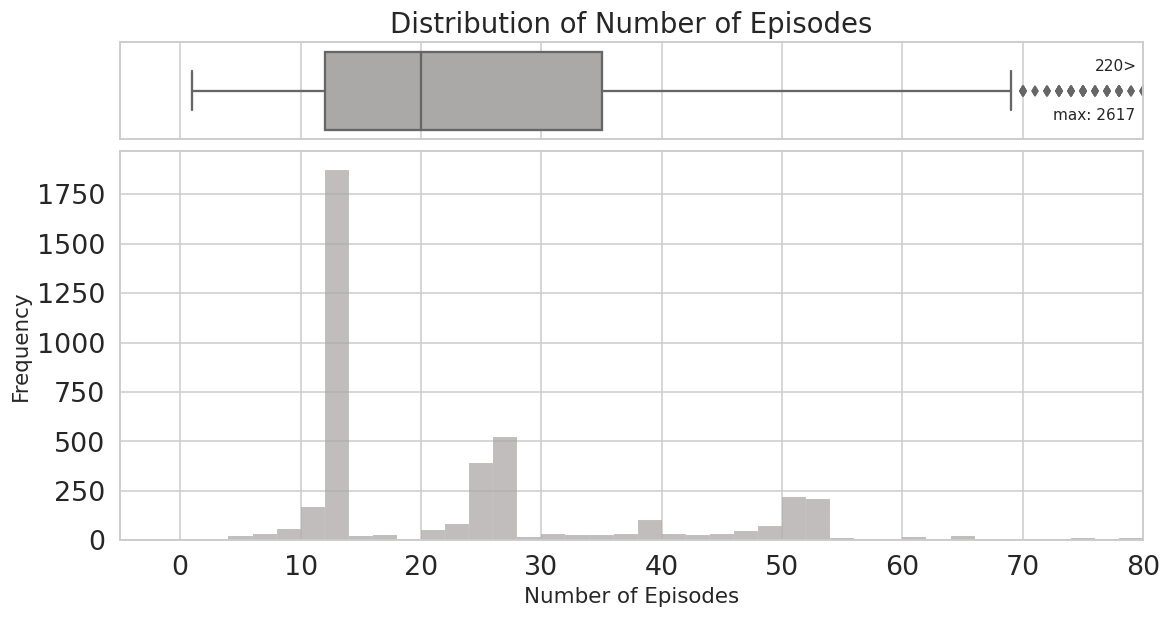

In [9]:
fig, axs = plt.subplots(2, 1, sharex=True, gridspec_kw={"height_ratios": (.2, .8)}, figsize=(12, 6), dpi=110)
fig.subplots_adjust(wspace=0, hspace=0.05)
sns.set_theme(font_scale=1, style='whitegrid')
sns.boxplot(x='num_eps', data=anime, color=grey, ax=axs[0])
sns.histplot(x='num_eps', data=anime, bins=range(0, 116, 2), color=grey, ax=axs[1])

axs[0].set_title('Distribution of Number of Episodes', fontdict={'fontsize':18})
axs[0].set_xlabel('')
axs[0].text(x=76, y=-0.2, s=f"{anime.query('num_eps >= 80').shape[0]}>", fontdict={'fontsize':10})
axs[0].text(x=72.5, y=0.3, s=f"max: {anime['num_eps'].max()}", fontdict={'fontsize':10})

axs[1].set_xlabel('Number of Episodes', fontdict={'fontsize':14})
axs[1].set_ylabel('Frequency', fontdict={'fontsize':14})
axs[1].set_xlim(-5, 80)
plt.show()

In [10]:
anime.loc[anime['num_eps'] == anime['num_eps'].max(), ['title', 'num_eps', 'ongoing', 'start_year', 'end_year', 'duration']]

,title,num_eps,ongoing,start_year,end_year,duration
3513,Sazae-san,2617,True,1969.0,2030.0,NaN


### `ongoing`

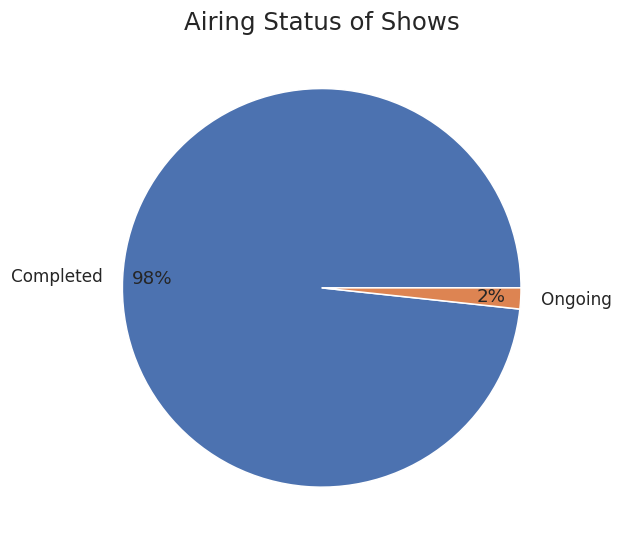

In [11]:
fig = plt.figure(figsize=(10, 6), dpi=110)
plt.pie(anime['ongoing'].value_counts(), labels=['Completed', 'Ongoing'], autopct='%1.0f%%', pctdistance=0.85, labeldistance=1.1)
plt.title('Airing Status of Shows', fontdict={'fontsize':16})
plt.show()

### `duration`

In [12]:
anime['duration'].agg(['min', 'median', 'mean', 'max'])

min        1.000000
median     5.000000
mean       7.246784
max       90.000000
Name: duration, dtype: float64

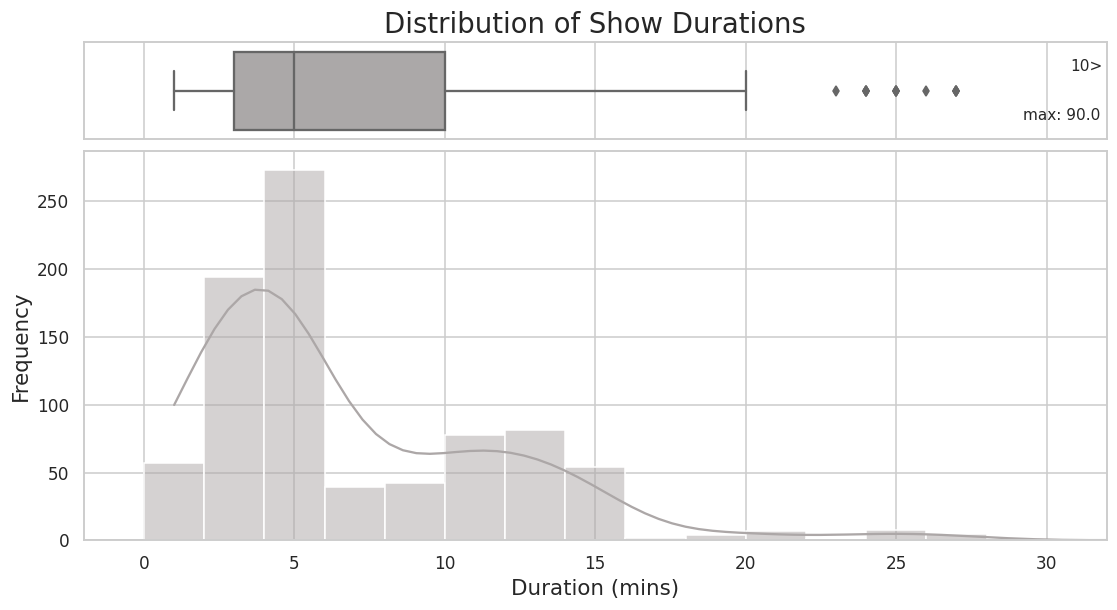

In [13]:
fig, axs = plt.subplots(2, 1, sharex=True, gridspec_kw={"height_ratios": (.2, .8)}, figsize=(12, 6), dpi=110)
fig.subplots_adjust(wspace=0, hspace=0.05)
sns.set_theme(font_scale=1, style='whitegrid')
sns.boxplot(x='duration', data=anime, color=grey, ax=axs[0])
sns.histplot(x='duration', data=anime, kde=True, bins=range(0, 116, 2), color=grey, ax=axs[1])

axs[0].set_title('Distribution of Show Durations', fontdict={'fontsize':18})
axs[0].set_xlabel('')
axs[0].text(x=30.8, y=-0.2, s=f"{anime.query('duration >= 32').shape[0]}>", fontdict={'fontsize':10})
axs[0].text(x=29.2, y=0.3, s=f"max: {anime['duration'].max()}", fontdict={'fontsize':10})

axs[1].set_xlabel('Duration (mins)', fontdict={'fontsize':14})
axs[1].set_ylabel('Frequency', fontdict={'fontsize':14})
axs[1].set_xlim(-2, 32)
plt.show()

In [14]:
anime.loc[anime['duration'] == anime['duration'].max(), ['title', 'duration', 'num_eps', 'ongoing', 'start_year', 'end_year']]

,title,duration,num_eps,ongoing,start_year,end_year
3704,Heidi: Heidi to Clara Hen,90.0,1,False,1996.0,1996.0


### `studio`

In [15]:
anime['studio'].nunique()

347

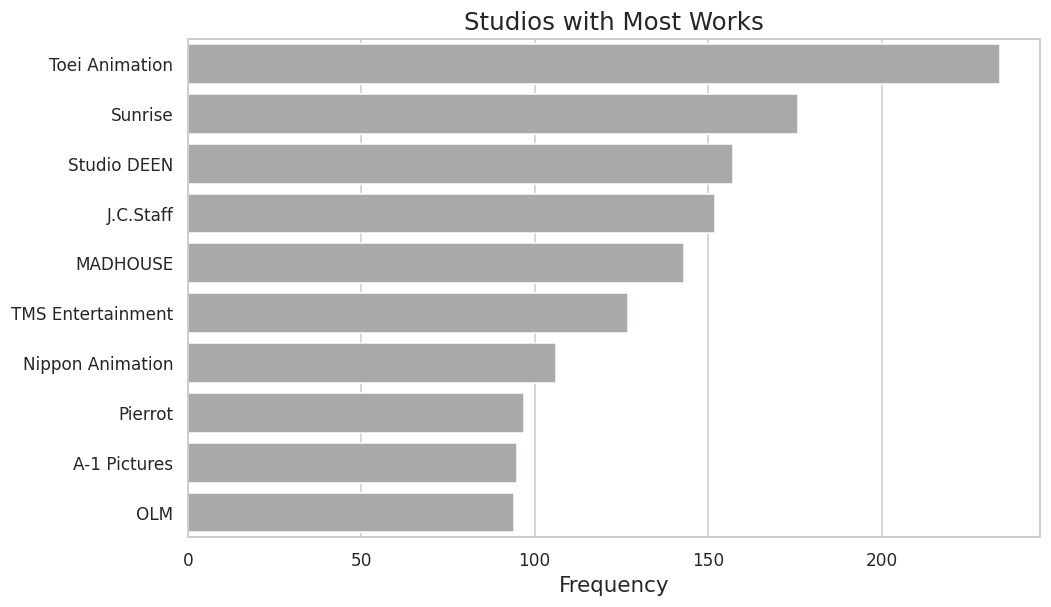

In [16]:
fig = plt.figure(figsize=(10, 6), dpi=110)
sns.set_theme(font_scale=1, style='whitegrid')
sns.countplot(y='studio', data=anime, 
              order=anime['studio'].value_counts().iloc[:10].index,
              color=grey)
plt.title('Studios with Most Works', fontdict={'fontsize':16})
plt.xlabel('Frequency', fontdict={'fontsize':14})
plt.ylabel('')
plt.show()

### `start_year`

In [17]:
anime['start_year'].agg(['min', 'mean', 'median', 'max'])

min       1961.000000
mean      2006.406662
median    2010.000000
max       2021.000000
Name: start_year, dtype: float64

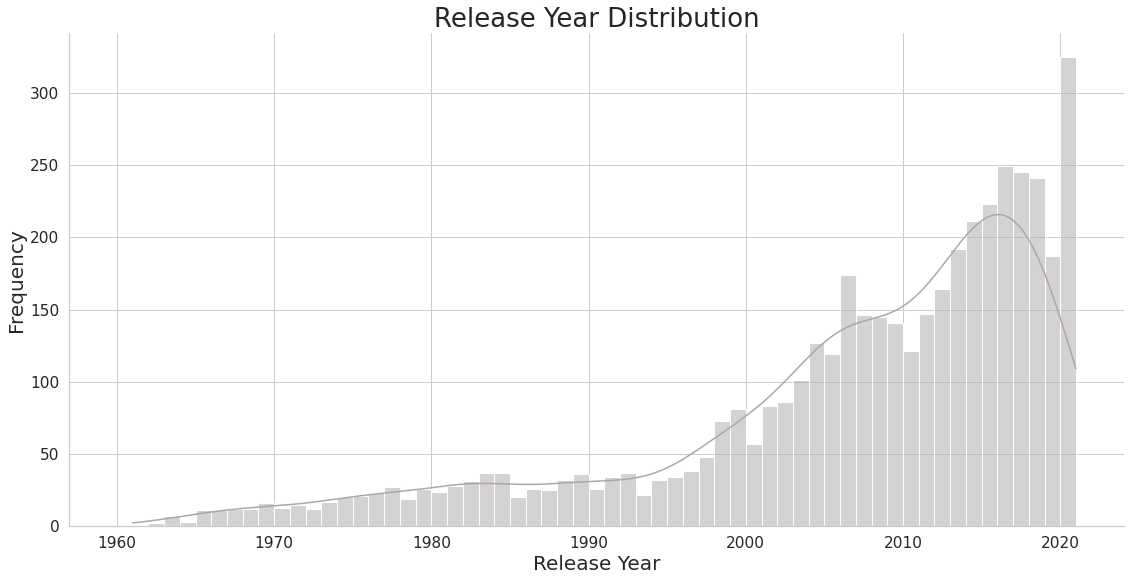

In [18]:
sns.set_theme(font_scale=1.4, style='whitegrid')
sns.displot(x='start_year', data=anime, bins=[year for year in range(1960, 2022)], kde=True, color=grey, height=8, aspect=2)
plt.title('Release Year Distribution', fontdict={'fontsize':26})
plt.xlabel('Release Year', fontdict={'fontsize':20})
plt.ylabel('Frequency', fontdict={'fontsize':20})
plt.show()

### `season`

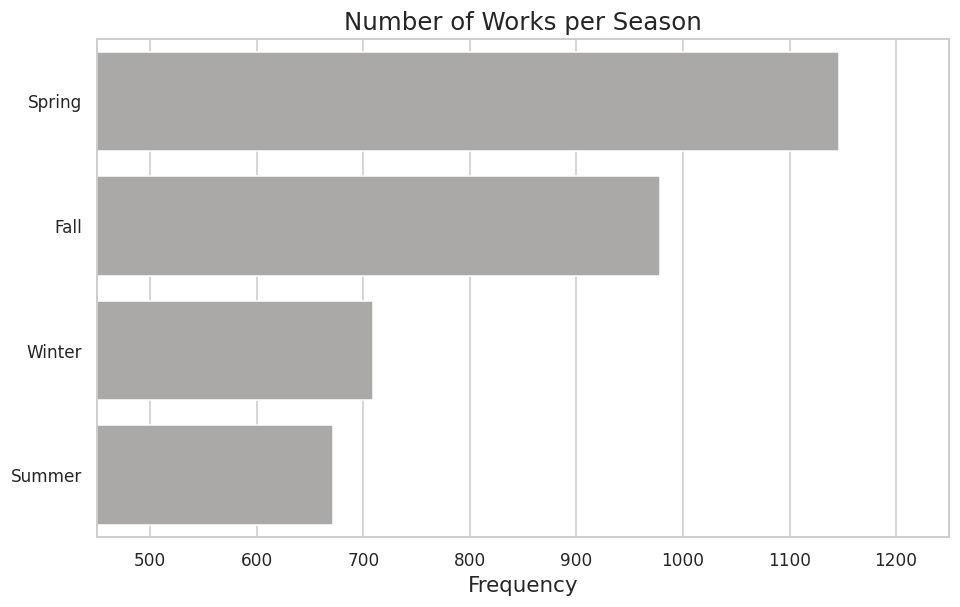

In [19]:
fig = plt.figure(figsize=(10, 6), dpi=110)
sns.set_theme(font_scale=1, style='whitegrid')
sns.countplot(y='season', data=anime, 
              order=anime['season'].value_counts().index,
              color=grey)
plt.title('Number of Works per Season', fontdict={'fontsize':16})
plt.xlabel('Frequency', fontdict={'fontsize':14})
plt.ylabel('')
plt.xlim(450, 1250)
plt.show()

### `avg_rating`

In [64]:
anime['avg_rating'].agg(['min', 'median', 'mean', 'max'])

min       1.333000
median    3.449000
mean      3.465518
max       4.633000
Name: avg_rating, dtype: float64

#### Which shows are the highest rated?

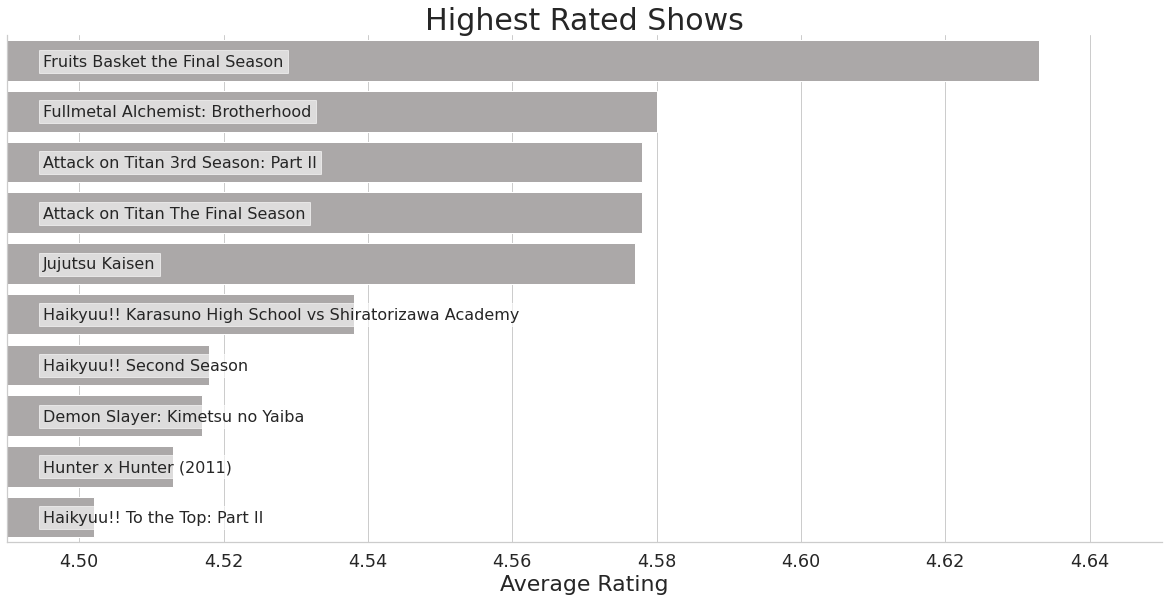

In [20]:
top10 = anime.head(10).copy(deep=True)
top10['title'] = top10['title'].astype('string')

sns.set_theme(font_scale=1.6, style='whitegrid')
sns.catplot(x='avg_rating', y='title', data=top10, kind='bar', height=8, aspect=3, color=grey)
plt.title('Highest Rated Shows', fontdict={'fontsize':30})
plt.xlabel('Average Rating', fontdict={'fontsize':22})
plt.ylabel('')
plt.yticks([])
plt.xlim(4.49, 4.65)
for idx, val in enumerate(top10['title']):
    plt.text(4.495, idx+0.1, val, fontdict={'fontsize':16, 'backgroundcolor':(1, 1, 1, 0.6)})
plt.show()

### `num_votes`

#### Which shows have the most votes?

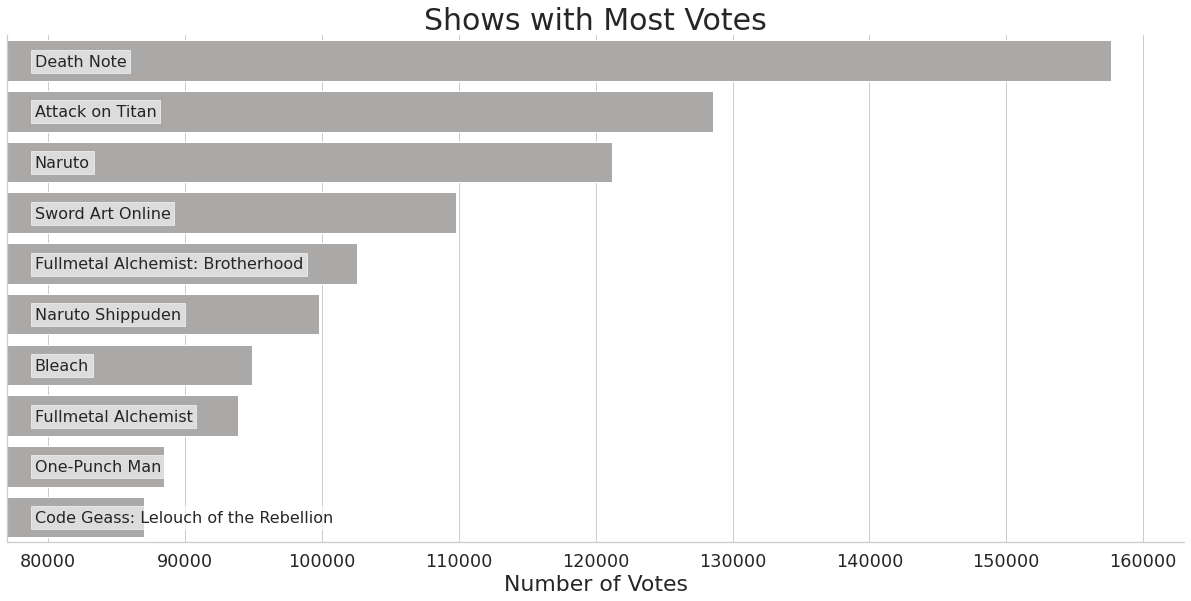

In [21]:
top10 = anime.sort_values('num_votes', ascending=False).head(10).copy(deep=True)
top10['title'] = top10['title'].astype('string')

sns.set_theme(font_scale=1.6, style='whitegrid')
sns.catplot(x='num_votes', y='title', data=top10, kind='bar', height=8, aspect=2.7, color=grey)
plt.title('Shows with Most Votes', fontdict={'fontsize':30})
plt.xlabel('Number of Votes', fontdict={'fontsize':22})
plt.ylabel('')
plt.yticks([])
plt.xlim(77000, 163000)
for idx, val in enumerate(top10['title']):
    plt.text(79000, idx+0.1, val, fontdict={'fontsize':16, 'backgroundcolor':(1, 1, 1, 0.6)})
plt.show()

### `tags`

In [22]:
tags_df = anime[['title', 'tags']].set_index('title')

In [23]:
tags_df = tags_df.explode('tags').reset_index()

In [24]:
tags_df['tags'][0]

'Drama'

In [25]:
tags_df['tags'].nunique()

493

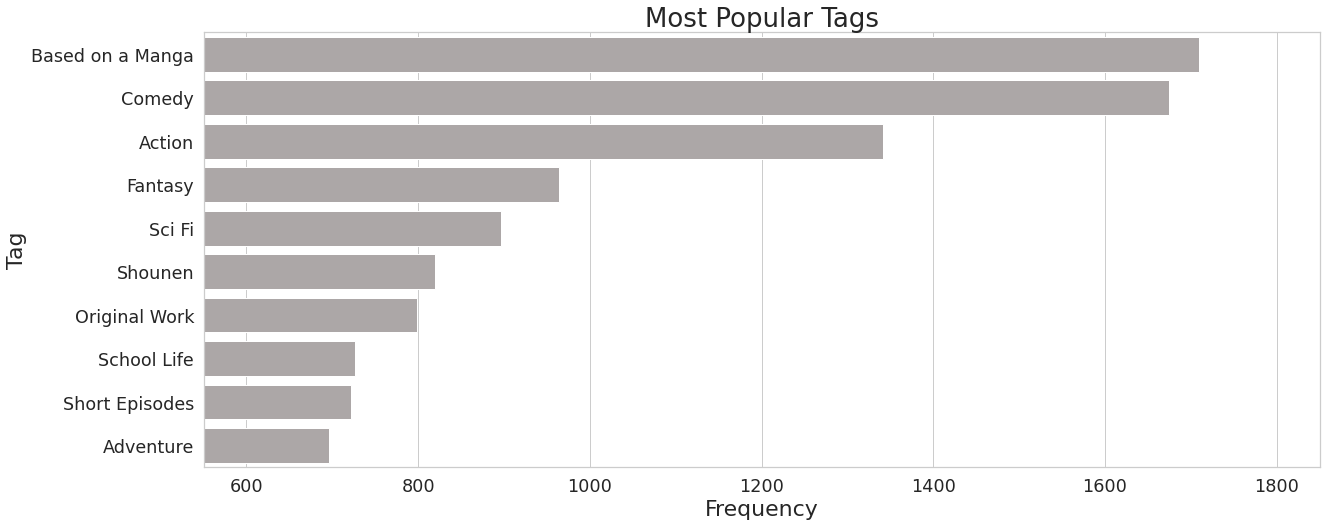

In [37]:
fig = plt.figure(figsize=(20, 8))
sns.set_theme(font_scale=1.6, style='whitegrid')
sns.countplot(y='tags', data=tags_df, 
              order=tags_df['tags'].value_counts().iloc[:10].index,
              color=grey, saturation=1)
plt.title('Most Popular Tags', fontdict={'fontsize':26})
plt.xlabel('Frequency', fontdict={'fontsize':22})
plt.ylabel('Tag', fontdict={'fontsize':22})
plt.xlim(550, 1850)
plt.show()

### `content_warnings`

In [27]:
cw_df = anime[['title', 'content_warnings']].set_index('title')

In [28]:
cw_df = cw_df.explode('content_warnings').reset_index()

In [29]:
cw_df

,title,content_warnings
0,Fruits Basket the Final Season,Emotional Abuse
1,Fruits Basket the Final Season,Mature Themes
2,Fruits Basket the Final Season,Suicide
3,Fullmetal Alchemist: Brotherhood,Animal Abuse
4,Fullmetal Alchemist: Brotherhood,Mature Themes
...,...,...
5147,Pupa,Physical Abuse
5148,Pupa,Domestic Abuse
5149,Mahou Shoujo? Naria Girls,None
5150,Vampire Holmes,None


In [30]:
cw_df['content_warnings'].nunique()

18

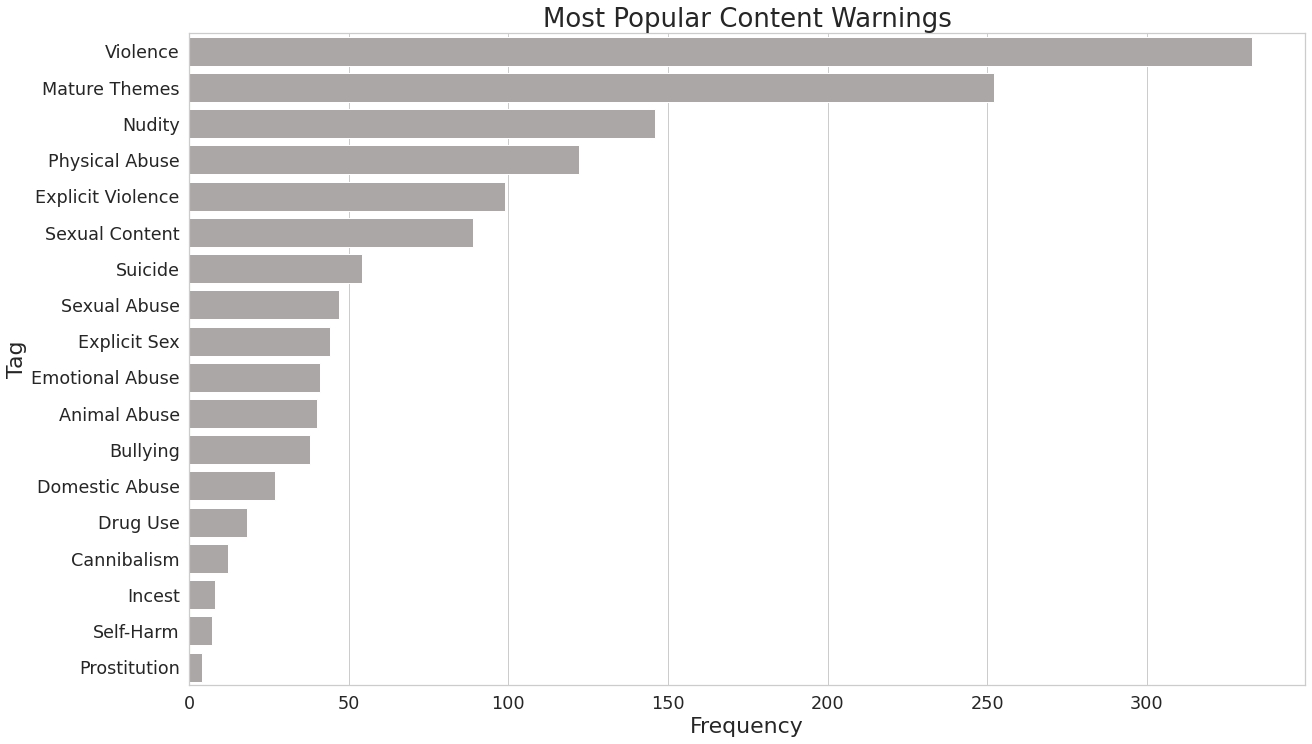

In [38]:
fig = plt.figure(figsize=(20, 12))
sns.set_theme(font_scale=1.6, style='whitegrid')
sns.countplot(y='content_warnings', data=cw_df, 
              order=cw_df['content_warnings'].value_counts().index,
              color=grey, saturation=1)
plt.title('Most Popular Content Warnings', fontdict={'fontsize':26})
plt.xlabel('Frequency', fontdict={'fontsize':22})
plt.ylabel('Tag', fontdict={'fontsize':22})
plt.show()

### `username`

In [39]:
df['username'].nunique()

117162

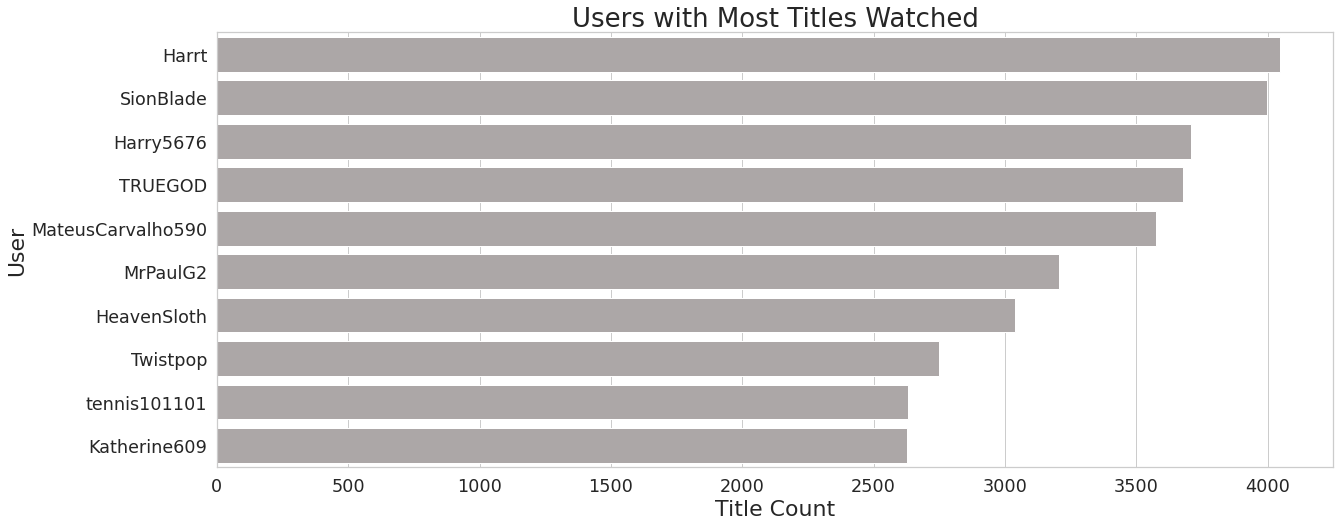

In [44]:
fig = plt.figure(figsize=(20, 8))
sns.set_theme(font_scale=1.6, style='whitegrid')
sns.countplot(y='username', data=df, 
              order=df['username'].value_counts().iloc[:10].index,
              color=grey, saturation=1)
plt.title('Users with Most Titles Watched', fontdict={'fontsize':26})
plt.xlabel('Title Count', fontdict={'fontsize':22})
plt.ylabel('User', fontdict={'fontsize':22})
plt.show()

### `status`

In [46]:
df['status'].value_counts()

Watched     8212660
Dropped      386434
Watching     354600
Stalled      251940
Name: status, dtype: int64

### `times_watched`

In [47]:
df['times_watched'].agg(['min', 'max'])

min      0
max    181
Name: times_watched, dtype: int64

In [53]:
df['times_watched'].value_counts().head(10)

1     7554419
0      992974
2      384097
3      132263
4       45967
5       26783
99      14204
6       11292
10       7227
7        6137
Name: times_watched, dtype: int64

### `user_rating`

In [75]:
df['user_rating'].agg(['min', 'mean', 'median', 'max'])

min       0.500000
mean      3.837598
median    4.000000
max       5.000000
Name: user_rating, dtype: float64

In [83]:
df['user_rating'].value_counts()

5.0    2085986
4.0    2045439
3.5    1455865
4.5    1336762
3.0    1103264
2.5     508632
2.0     328126
1.5     141168
1.0     110643
0.5      89749
Name: user_rating, dtype: int64